## RGB Color space based images

In [1]:
import cv2
import numpy as np

In [2]:
input = cv2.imread('images/input.jpg')
cv2.imshow('Hello OpenCV', input)
cv2.waitKey() 
cv2.destroyAllWindows()

In [3]:
# colorful images have 3 dimensional matrix. so 3d colors.
input.shape 

(830, 1245, 3)

Let's retrieve the colorful image's first pixel's R, G, B value .

In [4]:
B, G, R = input[0, 0]
print(B, G, R)

12 18 31


In [5]:
print(f'height of an image is {int(input.shape[0])} pixels')
print(f'weight of an image is {int(input.shape[1])} pixels')

height of an image is 830 pixels
weight of an image is 1245 pixels


In [6]:
cv2.imwrite('output.png', input)

True

## Grayscale Color space

let's convert above image to grayscale

In [7]:
gray_image = cv2.cvtColor(input, cv2.COLOR_BGR2GRAY)

In [8]:
cv2.imshow('Grayscale image', gray_image)
cv2.waitKey() 
cv2.destroyAllWindows()

Easier and Faster way to convert image to grayscale is given below.

In [9]:
gray_image2 = cv2.imread('images/input.jpg', 0) # 0 means Black & White
cv2.imshow('Hello OpenCV', gray_image2)
cv2.waitKey() 
cv2.destroyAllWindows()

In [10]:
# gray scale images are made with black and white only, so, they have 2d colors. so matrices will be of 2 dimensional.
print(gray_image.shape) 

(830, 1245)


In [11]:
# here, there are no RGB, only one value between 0 to 255 will be there.
# this value define the darkness of white to black, that is why it is made of Black & White color.
print(gray_image2[0, 0])

21


## HSV ColorSpace

In [12]:
input = cv2.imread('images/input.jpg')

hsv_image = cv2.cvtColor(input, cv2.COLOR_BGR2HSV)

cv2.imshow('HSV Image', hsv_image)
cv2.imshow('Hue channel', hsv_image[:, :, 0])
cv2.imshow('Saturation channel', hsv_image[:, :, 1])
cv2.imshow('Value channel', hsv_image[:, :, 2])

cv2.waitKey() 
cv2.destroyAllWindows()

# individual representation of colors of RGB Colorspace image 

In [13]:
image = cv2.imread('images/input.jpg')

below, split function split image to color index.

In [14]:
B, G, R = cv2.split(image)

print(R.shape, G.shape, B.shape)

(830, 1245) (830, 1245) (830, 1245)


##### now, we'll try to show the red, green and blue part of image individually
##### but that will not work as expected, here is the example

let's show red color part of image

In [15]:
cv2.imshow("Red", R)
cv2.waitKey() 
cv2.destroyAllWindows()

let's show green color part of image

In [16]:
cv2.imshow("Green", G)
cv2.waitKey() 
cv2.destroyAllWindows()

let's show blue color part of image

In [17]:
cv2.imshow("Blue", B)
cv2.waitKey() 
cv2.destroyAllWindows()

let's merge R, G, B matrices to get our image back

In [18]:
merged_image = cv2.merge([B, G, R])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

let's amplify the blue color intensity

In [19]:
merged_image = cv2.merge([B+100, G, R])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

let's amplify the red color intensity

In [20]:
merged_image = cv2.merge([B, G, R+100])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

let's amplify the green color intensity

In [21]:
merged_image = cv2.merge([B, G+100, R])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

Blue + Green = CYAN, let's make CYAN color intensity high

In [22]:
merged_image = cv2.merge([B+100, G+100, R])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

red + Green = yellow, let's make yellow color intensity high

In [23]:
merged_image = cv2.merge([B, G+100, R+100])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

red + blue = purple, let's make purple color intensity high

In [24]:
merged_image = cv2.merge([B+100, G, R+100])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

red + green + blue = whiteness, let's make whiteness intensity high

In [25]:
merged_image = cv2.merge([B+100, G+100, R+100])
cv2.imshow("Merged Color based image", merged_image)
cv2.waitKey() 
cv2.destroyAllWindows()

Let's get Red, Blue, and Green colored images individually.

In [26]:
image = cv2.imread('images/input.jpg')

In [27]:
# get B, G, R colors
B, G, R = cv2.split(image)

In [28]:
# now, we've to pass the R, G and B indicidually to merge function of cv2,
# but that will not accept list of one argument, so for other args, we'll pass zero.
# we can't use the normal zero for that, so, for that, we'll create numpy zero matrix.

zeros = np.zeros(image.shape[:2], dtype = "uint8")

In [29]:
# merge function take the list in BGR format, so be careful about that
cv2.imshow("Red", cv2.merge([zeros, zeros, R]))
cv2.imshow("Green", cv2.merge([zeros, G, zeros]))
cv2.imshow("Blue", cv2.merge([B, zeros, zeros]))

cv2.waitKey(5000) # 5 seconds wait, then destroy windows
cv2.destroyAllWindows()

In [30]:
image.shape[:2]

(830, 1245)

### Histogram of images

In [31]:
from matplotlib import pyplot as plt

In [32]:
image = cv2.imread('images/input.jpg')

In [33]:
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

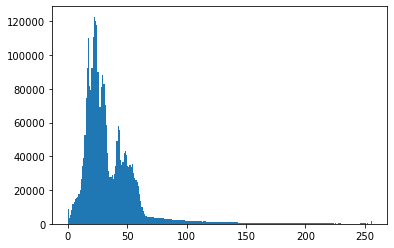

In [34]:
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

above is only blue color channel

let's get all three color channel histogram

In [35]:
color = ('b', 'g' , 'r')

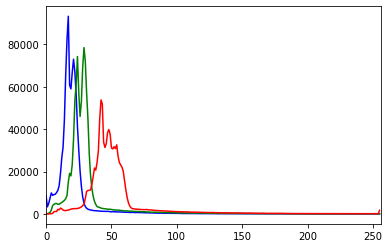

In [36]:
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0,256])

plt.show()

## Creating shapes in images

## Let's draw a line in this window

In [37]:
# create a black image first as a RGB
image = np.zeros((512, 512, 3), np.uint8)

# line function will take params as : start point(tuple), endpoint(tuple), color RGB(tuple), line width
cv2.line(image, (0, 0), (511,511), (255,127,0), 5)
cv2.imshow("Blue Line", image)
cv2.waitKey()
cv2.destroyAllWindows()

## Let's draw rectangle

In [38]:
# create a black image first as a RGB
image = np.zeros((512, 512, 3), np.uint8)

# rectangle function will take params as : start point(tuple), endpoint(tuple), color RGB(tuple), line width
cv2.rectangle(image, (100, 100), (300, 250), (127, 50, 127), 5)
cv2.imshow("Black Rectangle (RGB)", image)
cv2.waitKey()
cv2.destroyAllWindows()

## let's try to do above things for black and white images

In [39]:
# create a black image as black and white
image_bw = np.zeros((512, 512), np.uint8)

# line function will take params as : start point(tuple), endpoint(tuple), color RGB(tuple), line width
cv2.line(image_bw, (0, 0), (511,511), (255,127,0), 5)
cv2.imshow("Black Rectangle (RGB)", image_bw)
cv2.waitKey()
cv2.destroyAllWindows()

In [40]:
# create a black image as black and white
image_bw = np.zeros((512, 512), np.uint8)

# rectangle function will take params as : start point(tuple), endpoint(tuple), color RGB(tuple), line width
cv2.rectangle(image_bw, (100, 100), (300, 250), (127, 50, 127), 5)
cv2.imshow("Black Rectangle (RGB)", image_bw)
cv2.waitKey()
cv2.destroyAllWindows()

## How about the circles...

In [41]:
image = np.zeros((512, 512, 3), np.uint8)

# circle function will take params as :  point to start drawing, radius, color to fill, thickness of line(-1 to fill whole shape)
cv2.circle(image, (350, 350), 100, (15, 75, 50), -1)
cv2.imshow("Circle", image)
cv2.waitKey()
cv2.destroyAllWindows()

## Polygons

In [42]:
image = np.zeros((512, 512, 3), np.uint8)

# let's define points first
pts = np.array([[10, 50], [400, 50], [90, 200], [50, 500]], np.int32)

# we've to reshape above points matrix to the required form
pts = pts.reshape((-1, 1, 2))

print(pts)

[[[ 10  50]]

 [[400  50]]

 [[ 90 200]]

 [[ 50 500]]]


In [43]:
# polylines function take params as : points array, polygon is closed or not (T/F), color, thickness
cv2.polylines(image, [pts], True, (0, 0, 255), 3)
cv2.imshow("Polygon", image)
cv2.waitKey()
cv2.destroyAllWindows()

## Text in images

### Let's even add text with cv2.putText

cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)

- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX 
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

In [44]:
image = np.zeros((512,512,3), np.uint8)

cv2.putText(image, 'Hello World!', (75,290), cv2.FONT_HERSHEY_COMPLEX, 2, (100,170,0), 3)
cv2.imshow("Hello World!", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Translations

This an affine transform that simply shifts the position of an image.

We use cv2.warpAffine to implement these transformations.


In [45]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')

# Store height and width of the image
height, width = image.shape[:2]

quarter_height, quarter_width = height/4, width/4

#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
cv2.imshow('Translation', img_translation)
cv2.waitKey()
cv2.destroyAllWindows()

In [46]:
print(T)

[[  1.     0.   311.25]
 [  0.     1.   207.5 ]]


## Rotations

cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)


In [47]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, .5)

rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

cv2.imshow('Rotated Image', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

### Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

But here's another method for simple rotations that uses the cv2.transpose function

In [48]:
#Other Option to Rotate
img = cv2.imread('images/input.jpg')

rotated_image = cv2.transpose(img)

cv2.imshow('Rotated Image - Method 2', rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [49]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
cv2.imshow('Horizontal Flip', flipped) 
cv2.waitKey()
cv2.destroyAllWindows()

## Scaling, re-sizing and interpolations

Re-sizing is very easy using the cv2.resize function, it's arguments are:

cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)


In [50]:
import cv2
import numpy as np

# load our input image
image = cv2.imread('images/input.jpg')

# Let's make our image 1/2 of it's original size, so 0.50 will be scale of x, y
image_scaled = cv2.resize(image, None, fx=0.50, fy=0.50)
cv2.imshow('Scaling - Linear Interpolation', image_scaled) 
cv2.waitKey()

# Let's double the size of our image
img_scaled = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
cv2.imshow('Scaling - Cubic Interpolation', img_scaled)
cv2.waitKey()

# Let's skew the re-sizing by setting exact dimensions
# size of 100 x 400 is set here
img_scaled = cv2.resize(image, (100, 400), interpolation = cv2.INTER_AREA)
cv2.imshow('Scaling - Skewed Size', img_scaled) 
cv2.waitKey()

cv2.destroyAllWindows()

## Image Pyramids

Useful when scaling images in object detection.

In [51]:
import cv2

image = cv2.imread('images/input.jpg')

smaller = cv2.pyrDown(image) # mak3 image 50 % smaller
larger = cv2.pyrUp(smaller) # mak3 image 50 % bigger

cv2.imshow('Original', image )

cv2.imshow('Smaller ', smaller )
cv2.imshow('Larger ', larger )
cv2.waitKey(0)
cv2.destroyAllWindows()

## Cropping



In [52]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

cv2.imshow("Original Image", image)
cv2.waitKey(0) 
cv2.imshow("Cropped Image", cropped) 
cv2.waitKey(0) 
cv2.destroyAllWindows()

## Arithmetic Operations

These are simple operations that allow us to directly add or subract to the color intensity.

Calculates the per-element operation of two arrays. The overall effect is increasing or decreasing brightness.

In [53]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg')

# Create a matrix of ones, then multiply it by a scaler of 100 
# This gives a matrix with same dimesions of our image with all values being 100
M = np.ones(image.shape, dtype = "uint8") * 50 

# We use this to add this matrix M, to our image
# Notice the increase in brightness
added = cv2.add(image, M)
cv2.imshow("Added", added)

# Likewise we can also subtract
# Notice the decrease in brightness
subtracted = cv2.subtract(image, M)
cv2.imshow("Subtracted", subtracted)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [54]:
M = np.ones(image.shape, dtype = "uint8") * 75 
M

array([[[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       ...,

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]],

       [[75, 75, 75],
        [75, 75, 75],
        [75, 75, 75],
        ...,
        [75, 75, 75],
        [75, 75, 75],
        [75, 75, 75]]], dtype=uint8)

## Bitwise Operations and Masking

To demonstrate these operations let's create some simple images

In [55]:
import cv2
import numpy as np

# If you're wondering why only two dimensions, well this is a grayscale image, 
# if we doing a colored image, we'd use 
# rectangle = np.zeros((300, 300, 3),np.uint8)

# Making a sqare
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2.imshow("Square", square)

# Making a ellipse
ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 300, 0, 180, 255, -1)
cv2.imshow("Ellipse", ellipse)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Experimenting with some bitwise operations

In [56]:
# Shows only where they intersect
And = cv2.bitwise_and(square, ellipse)
cv2.imshow("AND", And)

# Shows where either square or ellipse is 
bitwiseOr = cv2.bitwise_or(square, ellipse)
cv2.imshow("OR", bitwiseOr)

# Shows where either exist by itself
bitwiseXor = cv2.bitwise_xor(square, ellipse)
cv2.imshow("XOR", bitwiseXor)

# Shows everything that isn't part of the square
bitwiseNot_sq = cv2.bitwise_not(square)
cv2.imshow("NOT - square", bitwiseNot_sq)

# Shows everything that isn't part of the ellipse
bitwiseNot_sq2 = cv2.bitwise_not(ellipse)
cv2.imshow("NOT - ellipse", bitwiseNot_sq2)
cv2.waitKey(0)

### Notice the last operation inverts the image totally

cv2.destroyAllWindows()

## Convolutions and Blurring

In [57]:
import cv2
import numpy as np

image = cv2.imread('images/elephant.jpg')
cv2.imshow('Original Image', image)

# Creating our 3 x 3 kernel
kernel_3x3 = np.ones((3, 3), np.float32) / 9

# We use the cv2.fitler2D to conovlve the kernal with an image 
blurred = cv2.filter2D(image, -1, kernel_3x3)
cv2.imshow('3x3 Kernel Blurring', blurred)

# Creating our 7 x 7 kernel
kernel_7x7 = np.ones((7, 7), np.float32) / 49

blurred2 = cv2.filter2D(image, -1, kernel_7x7)
cv2.imshow('7x7 Kernel Blurring', blurred2)
cv2.waitKey(0)

cv2.destroyAllWindows()

In [58]:
print(np.ones((3, 3), np.float32) / 9)
print(np.ones((7, 7), np.float32) / 49)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
[[0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]
 [0.02040816 0.02040816 0.02040816 0.02040816 0.02040816 0.02040816
  0.02040816]]


### Other commonly used blurring methods in OpenCV

In [59]:
import cv2
import numpy as np

image = cv2.imread('images/elephant.jpg')

# Averaging done by convolving the image with a normalized box filter. 
# This takes the pixels under the box and replaces the central element
# Box size needs to odd and positive 
blur = cv2.blur(image, (3,3))
cv2.imshow('Averaging', blur)

# Instead of box filter, gaussian kernel
# here, third param is amount of blurness which is zero here.
Gaussian = cv2.GaussianBlur(image, (7,7), 0)
cv2.imshow('Gaussian Blurring', Gaussian)

# Takes median of all the pixels under kernel area and central 
# element is replaced with this median value
median = cv2.medianBlur(image, 5)
cv2.imshow('Median Blurring', median)

# Bilateral is very effective in noise removal while keeping edges sharp
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
cv2.imshow('Bilateral Blurring', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Image De-noising - Non-Local Means Denoising

In [60]:
import numpy as np
import cv2

image = cv2.imread('images/elephant.jpg')

# Parameters, after None are - the filter strength 'h' (5-10 is a good range)
# Next is hForColorComponents, set as same value as h again
# 
dst = cv2.fastNlMeansDenoisingColored(image, None, 6, 6, 7, 21)
cv2.imshow("Original", image)
cv2.imshow('Fast Means Denoising', dst)
cv2.waitKey(0)

cv2.destroyAllWindows()

## Sharpening 

By altering our kernels we can implement sharpening, which has the effects of in strengthening or emphasizing edges in an image.

In [61]:
image = cv2.imread('images/input.jpg')
cv2.imshow('Original', image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow('Image Sharpening', sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [62]:
image = cv2.imread('images/elephant.jpg')
cv2.imshow('Original', image)

# Create our shapening kernel, we don't normalize since the 
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

cv2.imshow('Image Sharpening', sharpened)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Thresholding, Binarization & Adaptive Thresholding
#### thresholding convert image into lowest point andhighest point, means 0 and 255,
#### means values less than 127 will become 0 and values greater than 127 will become 255 
#### thresholding works with only greyscale images
#### So, In thresholding, we convert a grey scale image to it's binary form

In [63]:
import cv2
import numpy as np

# Load our image as greyscale 
image = cv2.imread('images/gradient.jpg',0)
cv2.imshow('Original', image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('1 Threshold Binary', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
cv2.imshow('2 Threshold Binary Inverse', thresh2)

# Values above 127 will be changed to 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
cv2.imshow('3 THRESH TRUNC', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
cv2.imshow('4 THRESH TOZERO', thresh4)

# Resever of above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
cv2.imshow('5 THRESH TOZERO INV', thresh5)
cv2.waitKey(0) 
    
cv2.destroyAllWindows()

### Is there a better way of thresholding?

The biggest downfall of those simple threshold methods is that we need to provide the threshold value (i.e. the 127 value we used previously).
#### What if there was a smarter way of doing this?

There is with, Adaptive thresholding. 



In [64]:
import cv2
import numpy as np

# Load our new image
image = cv2.imread('images/Origin_of_Species.jpg', 0)

cv2.imshow('Original', image)
cv2.waitKey(0) 

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2.imshow('Threshold Binary', thresh1)
cv2.waitKey(0) 

# It's good practice to blur images as it removes noise
# GaussianBlur Params are : destImage, kernel size to blur, Kernel standard deviation along X-axis (horizontal direction).
image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
# params : image, max value of color, adaptive type, threshold type, Block size (should be odd), Constant that is subtracted from mean
# ADAPTIVE_THRESH_MEAN_C : based on mean of the neighbourhood of pixels
# ADAPTIVE_THRESH_GAUSSIAN_C : weighted sum of neighbourhood pixels under the Gaussian window
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                               cv2.THRESH_BINARY, 3, 5) 
cv2.imshow("Adaptive Mean Thresholding", thresh) 
cv2.waitKey(0) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow("Guassian Otsu's Thresholding", thresh) 
cv2.waitKey(0) 

cv2.destroyAllWindows()

## Dilation, Erosion, Opening and Closing 

#### Dilation : add pixels at the boundaries of an image
#### Erosion : remove pixels at the boundaries of an image
#### Opening : Erosion following by Dilation
#### Closing : Dilation following by Erosion

In [65]:
import cv2
import numpy as np

image = cv2.imread('images/opencv_inv.png', 0)

cv2.imshow('Original', image)
cv2.waitKey(0)

# Let's define our kernel size
kernel = np.ones((5,5), np.uint8)

# here, we'll provide iteration parameter, which will define how many time that operation should be applied
# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey(0)

# Now let's dilate
dilation = cv2.dilate(image, kernel, iterations = 1)
cv2.imshow('Dilation', dilation)
cv2.waitKey(0)

# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2.imshow('Opening', opening)
cv2.waitKey(0)

# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2.imshow('Closing', closing)
cv2.waitKey(0)


cv2.destroyAllWindows()

### There are some other less popular morphology operations, see the official OpenCV site:

http://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html

## Edge Detection & Image Gradients

In [66]:
import cv2
import numpy as np

image = cv2.imread('images/input.jpg',0)

height, width = image.shape

# Extract Sobel Edges
# here, we'll extract vertical and horizontal lines
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5) # horiz
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5) # verti

cv2.imshow('Original', image)
cv2.waitKey(0)
cv2.imshow('Sobel X', sobel_x)
cv2.waitKey(0)
cv2.imshow('Sobel Y', sobel_y)
cv2.waitKey(0)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)
cv2.imshow('sobel_OR', sobel_OR)
cv2.waitKey(0)

laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian)
cv2.waitKey(0)





##  Then, we need to provide two values: threshold1 and threshold2. Any gradient value larger than threshold2
# is considered to be an edge. Any value below threshold1 is considered not to be an edge. 
#Values in between threshold1 and threshold2 are either classiﬁed as edges or non-edges based on how their 
#intensities are “connected”. In this case, any gradient values below 60 are considered non-edges
#whereas any values above 120 are considered edges.


# Canny Edge Detection uses gradient values as thresholds
# The first threshold gradient
canny = cv2.Canny(image, 50, 120)
cv2.imshow('Canny', canny)
cv2.waitKey(0)

cv2.destroyAllWindows()


## Getting Perpsective Transform

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/scan.jpg')

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610], [530,780]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594], [420,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getPerspectiveTransform(points_A, points_B)
 
warped = cv2.warpPerspective(image, M, (420,594))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

## In affine transforms you only need 3 coordiantes to obtain the correct transform

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('images/ex2.jpg')
rows,cols,ch = image.shape

cv2.imshow('Original', image)
cv2.waitKey(0)

# Cordinates of the 4 corners of the original image
points_A = np.float32([[320,15], [700,215], [85,610]])

# Cordinates of the 4 corners of the desired output
# We use a ratio of an A4 Paper 1 : 1.41
points_B = np.float32([[0,0], [420,0], [0,594]])
 
# Use the two sets of four points to compute 
# the Perspective Transformation matrix, M    
M = cv2.getAffineTransform(points_A, points_B)

warped = cv2.warpAffine(image, M, (cols, rows))
 
cv2.imshow('warpPerspective', warped)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(M)

## Project, live sketch

In [ ]:
import cv2
import numpy as np

In [ ]:
def sketch(image):
    # greyscale first
    image_grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # then clean up by gaussian blur
    image_grey_blur = cv2.GaussianBlur(image_grey, (5,5), 0)
    
    # Extract edges by canny
    canny_edges = cv2.Canny(image_grey_blur, 10, 70)
    
    # invert the binarize the image
    ret, mask = cv2.threshold(canny_edges, 70, 255, cv2.THRESH_BINARY_INV)
    return mask

cap = cv2.VideoCapture(0)

while(True):
    ret, frame = cap.read()
    cv2.imshow("Live sketch", sketch(frame))
    if cv2.waitKey(1) == 13: # Enter
        break
cap.release()
cv2.destroyAllWindows()
    

# Contours

In [ ]:
import cv2
import numpy as np

# Let's load a simple image with 3 black squares
image = cv2.imread('images/shapes.jpg')
cv2.imshow('Input Image', image)
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Let's load a simple image with 3 black squares
image = cv2.imread('images/shapes_donut.jpg')
cv2.imshow('Input Image', image)
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.imshow('Canny Edges', edged)
cv2.waitKey(0)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

**cv2.findContours(image, Retrieval Mode, Approximation Method)**

Returns -> contours, hierarchy

**NOTE** In OpenCV 3.X, findContours returns a 3rd argument which is ret (or a boolean indicating if the function was successfully run). 

If you're using OpenCV 3.X replace line 12 with:

_, contours, hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

The variable 'contours' are stored as a numpy array of (x,y) points that form the contour

While, 'hierarchy' describes the child-parent relationships between contours (i.e. contours within contours)



#### Approximation Methods

Using cv2.CHAIN_APPROX_NONE stores all the boundary points. But we don't necessarily need all bounding points. If the points form a straight line, we only need the start and ending points of that line.

Using cv2.CHAIN_APPROX_SIMPLE instead only provides these start and end points of bounding contours, thus resulting in much more efficent storage of contour information..

## Sorting Contours

We can sort contours in many ways.

In [ ]:
import cv2
import numpy as np

# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
cv2.imshow('0 - Original Image', image)
cv2.waitKey(0)

# Create a black image with same dimensions as our loaded image
blank_image = np.zeros((image.shape[0], image.shape[1], 3))

# Create a copy of our original image
orginal_image = image

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 50, 200)
cv2.imshow('1 - Canny Edges', edged)
cv2.waitKey(0)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
print ("Number of contours found = ", len(contours))

#Draw all contours
cv2.drawContours(blank_image, contours, -1, (0,255,0), 3)
cv2.imshow('2 - All Contours over blank image', blank_image)
cv2.waitKey(0)

# Draw all contours over blank image
cv2.drawContours(image, contours, -1, (0,255,0), 3)
cv2.imshow('3 - All Contours', image)
cv2.waitKey(0)

cv2.destroyAllWindows()

### Let's now sort by area

In [ ]:
import cv2
import numpy as np

# Function we'll use to display contour area

def get_contour_areas(contours):
    # returns the areas of all contours as list
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image

# Let's print the areas of the contours before sorting
print("Contor Areas before sorting") 
print(get_contour_areas(contours))

# Sort contours large to small
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)
#sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)[:3]

print ("Contor Areas after sorting")
print (get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for c in sorted_contours:
    cv2.drawContours(orginal_image, [c], -1, (255,0,0), 3)
    cv2.waitKey(0)
    cv2.imshow('Contours by area', orginal_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import cv2
import numpy as np

# Functions we'll use for sorting by position

def x_cord_contour(contours):
    #Returns the X cordinate for the contour centroid
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass

    
def label_contour_center(image, c):
    # Places a red circle on the centers of contours
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
 
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image


# Load our image
image = cv2.imread('images/bunchofshapes.jpg')
orginal_image = image.copy()


# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
 
cv2.imshow("4 - Contour Centers ", image)
cv2.waitKey(0)

# Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)


# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(orginal_image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(orginal_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('6 - Left to Right Contour', orginal_image)
    cv2.waitKey(0)
    (x, y, w, h) = cv2.boundingRect(c)  
    
    # Let's now crop each contour and save these images
    cropped_contour = orginal_image[y:y + h, x:x + w]
    image_name = "output_shape_number_" + str(i+1) + ".jpg"
    print(image_name)
    cv2.imwrite(image_name, cropped_contour)
    
cv2.destroyAllWindows()




## Approximating Contours and Convex Hull 

***cv2.approxPolyDP(contour, Approximation Accuracy, Closed)***
- **contour** – is the individual contour we wish to approximate
- **Approximation Accuracy** – Important parameter is determining the accuracy of the approximation. Small values give precise-  approximations, large values give more generic approximation. A good rule of thumb is less than 5% of the contour perimeter
- **Closed** – a Boolean value that states whether the approximate contour should be open or closed 


In [ ]:
import numpy as np
import cv2

# Load image and keep a copy
image = cv2.imread('images/house.jpg')
orig_image = image.copy()
cv2.imshow('Original Image', orig_image)
cv2.waitKey(0) 

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)    
    cv2.imshow('Bounding Rectangle', orig_image)

cv2.waitKey(0) 
    
# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', image)
    
cv2.waitKey(0)   
cv2.destroyAllWindows()

## Convex Hull



In [ ]:
import numpy as np
import cv2

image = cv2.imread('images/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original Image', image)
cv2.waitKey(0) 

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours 
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)
    cv2.imshow('Convex Hull', image)

    # Iterate through each contour and compute the approx contour

for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.001 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)
    cv2.imshow('Approx Poly DP', image)

cv2.waitKey(0)    
cv2.destroyAllWindows()

## Shape Matching

**cv2.matchShapes(contour template, contour, method, method parameter)**

**Output** – match value (lower values means a closer match)

- Contour Template – This is our reference contour that we’re trying to find in the new image
- Contour – The individual contour we are checking against
- Method – Type of contour matching (1, 2, 3)
- Method Parameter – leave alone as 0.0 (not fully utilized in python OpenCV)


In [ ]:
import cv2
import numpy as np

# Load the shape template or reference image
template = cv2.imread('images/4star.jpg',0)
cv2.imshow('Template', template)
cv2.waitKey()

# Load the target image with the shapes we're trying to match
target = cv2.imread('images/shapestomatch.jpg')
target_gray = cv2.cvtColor(target,cv2.COLOR_BGR2GRAY)

# Threshold both images first before using cv2.findContours
ret, thresh1 = cv2.threshold(template, 127, 255, 0)
ret, thresh2 = cv2.threshold(target_gray, 127, 255, 0)

# Find contours in template
contours, hierarchy = cv2.findContours(thresh1, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# We need to sort the contours by area so that we can remove the largest
# contour which is the image outline
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

# We extract the second largest contour which will be our template contour
template_contour = contours[1]

# Extract contours from second target image
contours, hierarchy = cv2.findContours(thresh2, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for c in contours:
    # Iterate through each contour in the target image and 
    # use cv2.matchShapes to compare contour shapes
    match = cv2.matchShapes(template_contour, c, 3, 0.0)
    print(match)
    # If the match value is less than 0.15 we
    if match < 0.15:
        closest_contour = c
    else:
        closest_contour = [] 
                
cv2.drawContours(target, [closest_contour], -1, (0,255,0), 3)
cv2.imshow('Output', target)
cv2.waitKey()
cv2.destroyAllWindows()

http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html